In [1]:
!pip install mlxtend
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
 groceries = []
with open("groceries.csv") as f:
    groceries = f.read()



# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
    

In [3]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter

item_frequencies = Counter(all_groceries_list)


In [4]:
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [5]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))


<ipython-input-6-2201dfd3438c>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x=list(range(0,11)) ,height=frequencies[0:11],color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")


Text(0.5, 0, 'Items')

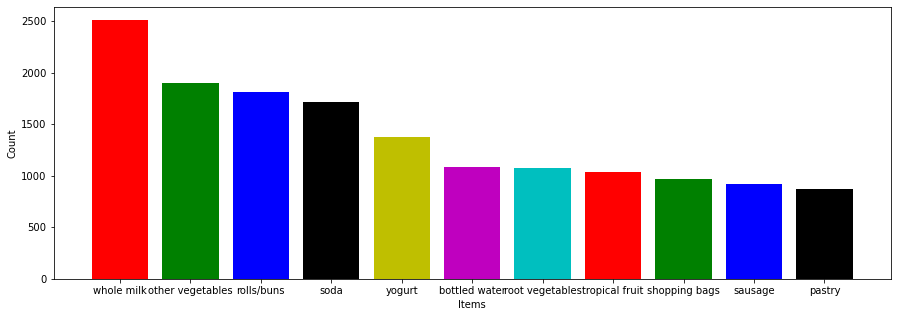

In [6]:
# barplot of top 10 

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(x=list(range(0,11)) ,height=frequencies[0:11],color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")
plt.ylabel("Count");plt.xlabel("Items")

In [7]:
#Creating Data Frame for the transactions data 

# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction


In [8]:
groceries_series.columns = ["transactions"]

In [9]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [10]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
frequent_itemsets_a = fpgrowth(X, min_support=0.005, use_colnames=True)
frequent_itemsets_a

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
996,0.005491,"(meat, soda)"
997,0.005084,"(root vegetables, meat)"
998,0.005287,"(meat, sausage)"
999,0.005287,"(meat, yogurt)"


# Similar methods for as seen above
#frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
#frequent_itemsets_b = fpmax(X, min_support=0.005, use_colnames=True)


#  Generating Association Rules from Frequent Itemsets

In [11]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets_a, metric="confidence", min_threshold=0.005)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
3,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
4,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280
...,...,...,...,...,...,...,...,...,...
2957,(sausage),(meat),0.093950,0.025826,0.005287,0.056277,2.179074,0.002861,1.032267
2958,(meat),(yogurt),0.025826,0.139502,0.005287,0.204724,1.467540,0.001684,1.082013
2959,(yogurt),(meat),0.139502,0.025826,0.005287,0.037901,1.467540,0.001684,1.012550
2960,(mustard),(whole milk),0.011998,0.255516,0.005186,0.432203,1.691492,0.002120,1.311181


# Rule Generation and Selection Criteria

In [12]:
rules = association_rules(frequent_itemsets_a, metric="lift", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
3,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
4,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280
...,...,...,...,...,...,...,...,...,...
2957,(sausage),(meat),0.093950,0.025826,0.005287,0.056277,2.179074,0.002861,1.032267
2958,(meat),(yogurt),0.025826,0.139502,0.005287,0.204724,1.467540,0.001684,1.082013
2959,(yogurt),(meat),0.139502,0.025826,0.005287,0.037901,1.467540,0.001684,1.012550
2960,(mustard),(whole milk),0.011998,0.255516,0.005186,0.432203,1.691492,0.002120,1.311181


In [13]:
rules.shape

(2962, 9)

In [14]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(X))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577,9835
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,9835
2,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467,9835
3,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803,9835
4,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280,9835
...,...,...,...,...,...,...,...,...,...,...
2957,(sausage),(meat),0.093950,0.025826,0.005287,0.056277,2.179074,0.002861,1.032267,9835
2958,(meat),(yogurt),0.025826,0.139502,0.005287,0.204724,1.467540,0.001684,1.082013,9835
2959,(yogurt),(meat),0.139502,0.025826,0.005287,0.037901,1.467540,0.001684,1.012550,9835
2960,(mustard),(whole milk),0.011998,0.255516,0.005186,0.432203,1.691492,0.002120,1.311181,9835


In [15]:
rules[ (rules['antecedent_len'] >= 9835) &
       (rules['confidence'] > 0.43) &
       (rules['lift'] > 2.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
46,"(tropical fruit, citrus fruit)",(other vegetables),0.019929,0.193493,0.009049,0.454082,2.346765,0.005193,1.477341,9835
70,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,9835
88,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566,9835
91,"(whole milk, citrus fruit, other vegetables)",(root vegetables),0.013015,0.108998,0.005796,0.445312,4.085493,0.004377,1.606313,9835
167,"(domestic eggs, margarine)",(whole milk),0.008338,0.255516,0.005186,0.621951,2.434099,0.003055,1.969280,9835
...,...,...,...,...,...,...,...,...,...,...
2895,(onions),(other vegetables),0.031012,0.193493,0.014235,0.459016,2.372268,0.008234,1.490817,9835
2901,"(root vegetables, onions)",(other vegetables),0.009456,0.193493,0.005694,0.602151,3.112008,0.003864,2.027167,9835
2907,"(whole milk, onions)",(other vegetables),0.012100,0.193493,0.006609,0.546218,2.822942,0.004268,1.777303,9835
2913,(herbs),(other vegetables),0.016268,0.193493,0.007728,0.475000,2.454874,0.004580,1.536205,9835


In [16]:
#we can select entries based on the "antecedents" or "consequents" columns:
rules[rules['antecedents']=={'citrus fruit','tropical fruit'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
36,"(tropical fruit, citrus fruit)",(whole milk),0.019929,0.255516,0.009049,0.454082,1.777116,0.003957,1.363728,9835
40,"(tropical fruit, citrus fruit)",(yogurt),0.019929,0.139502,0.006304,0.316327,2.267545,0.003524,1.258639,9835
46,"(tropical fruit, citrus fruit)",(other vegetables),0.019929,0.193493,0.009049,0.454082,2.346765,0.005193,1.477341,9835
78,"(tropical fruit, citrus fruit)",(root vegetables),0.019929,0.108998,0.005694,0.285714,2.621269,0.003522,1.247402,9835
564,"(tropical fruit, citrus fruit)",(pip fruit),0.019929,0.075648,0.005592,0.280612,3.709437,0.004085,1.284915,9835


In [17]:
rules[rules['antecedents']=={'root vegetables','citrus fruit'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
70,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,9835
77,"(root vegetables, citrus fruit)",(tropical fruit),0.017692,0.104931,0.005694,0.321839,3.067139,0.003838,1.319847,9835
83,"(root vegetables, citrus fruit)",(whole milk),0.017692,0.255516,0.009151,0.517241,2.024301,0.004630,1.542145,9835
93,"(root vegetables, citrus fruit)","(whole milk, other vegetables)",0.017692,0.074835,0.005796,0.327586,4.377460,0.004472,1.375887,9835


In [18]:
rules[rules['antecedents']=={'root vegetables', 'citrus fruit', 'whole milk'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
88,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566,9835


In [19]:
rules[rules['antecedents']=={'other vegetables', 'citrus fruit', 'whole milk'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
91,"(whole milk, citrus fruit, other vegetables)",(root vegetables),0.013015,0.108998,0.005796,0.445312,4.085493,0.004377,1.606313,9835


In [20]:
rules[rules['antecedents']=={'domestic eggs', 'margarine'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
167,"(domestic eggs, margarine)",(whole milk),0.008338,0.255516,0.005186,0.621951,2.434099,0.003055,1.96928,9835


In [21]:
rules[rules['antecedents']=={'root vegetables', 'onions'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
2901,"(root vegetables, onions)",(other vegetables),0.009456,0.193493,0.005694,0.602151,3.112008,0.003864,2.027167,9835


  #                         ********** Visualizing results:-

# Support vs Confidence

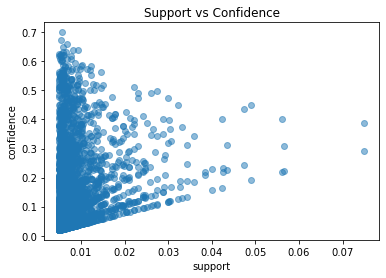

In [22]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)

plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


# Support vs Lift

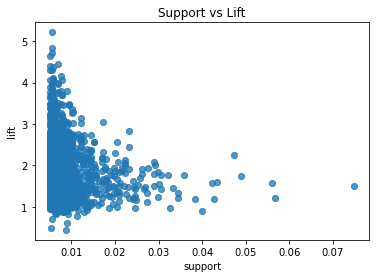

In [23]:
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Lift vs Confidence

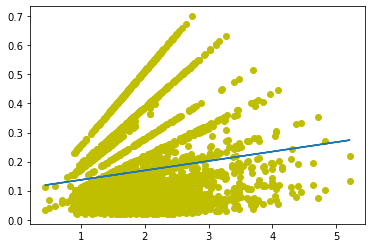

In [24]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [25]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

NameError: name 'frequent_itemsets' is not defined

<ipython-input-26-6c0224333500>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x=list(range(0,11)) ,height=frequent_itemsets_a.support[0:11],color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("item-sets");


Text(0, 0.5, 'support')

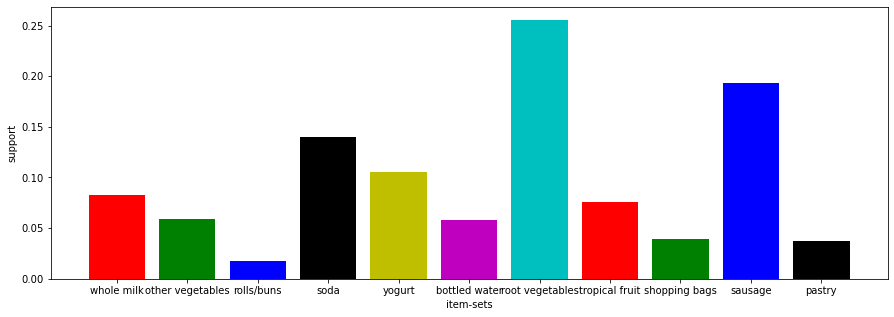

In [26]:
# barplot of top 10 

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(x=list(range(0,11)) ,height=frequent_itemsets_a.support[0:11],color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("item-sets");
plt.ylabel("support")

In [27]:
rules = association_rules(frequent_itemsets_a, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

## To eliminate Redudancy in Rules

In [28]:
from mlxtend.frequent_patterns import association_rules
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)


In [29]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [30]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]



In [31]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
397,"(whole milk, tropical fruit)","(root vegetables, yogurt)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712
615,"(whole milk, other vegetables)","(root vegetables, pip fruit)",0.074835,0.015557,0.005491,0.073370,4.716272,0.004326,1.062390
2664,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
381,"(root vegetables, tropical fruit)","(whole milk, other vegetables)",0.021047,0.074835,0.007016,0.333333,4.454257,0.005441,1.387748
1544,"(fruit/vegetable juice, whole milk)","(other vegetables, yogurt)",0.026640,0.043416,0.005084,0.190840,4.395570,0.003927,1.182193
91,"(root vegetables, citrus fruit)","(whole milk, other vegetables)",0.017692,0.074835,0.005796,0.327586,4.377460,0.004472,1.375887
293,"(other vegetables, yogurt)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
2303,"(root vegetables, whipped/sour cream)","(whole milk, other vegetables)",0.017082,0.074835,0.005186,0.303571,4.056556,0.003907,1.328442
1774,"(root vegetables, yogurt)","(whole milk, other vegetables)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
816,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171


#  The first rule & the second rule. states that the support for Vegitables and sausage compared to its default sale.